In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
from scipy.interpolate import CubicSpline
import seaborn as sns
import ipywidgets as widgets

<h1>Load data</h1>

In [2]:
# Copy here your data folder path
path = r'C:\Users\caprioglio\Dropbox\Oxford_PROJECTS\ICBA_PCBM_Interlayer\JV\20230406_PDA_ICBA_PCBM_2WEEKS_1683719091'

# Create here your result folder path
save_path = r'C:\Users\caprioglio\Dropbox\Oxford_PROJECTS\ICBA_PCBM_Interlayer\JV\20230406_PDA_ICBA_PCBM_2WEEKS_1683719091\Processed_data'

if not os.path.exists(save_path):
    os.makedirs(save_path)

filenames = glob.glob(path + "\*.tsv")
info_filename = glob.glob(path + "\*.csv")

device_info = pd.read_csv(info_filename[0])

pxls = device_info['pad'].drop_duplicates().values.tolist()
cells = device_info['slot'].drop_duplicates().values.tolist()
labels = device_info['user_label'].drop_duplicates().values.tolist()
active_area = device_info['area'].drop_duplicates().values.tolist()

device_list = list()

for px in pxls:
    device_list.append(f'device{px}')
    

<h1>Importing data</h1>

In [3]:
#Importing and sorting data

stab_volts = {}
light_JV1 = {}
light_JV2 = {}
dark_JV1 = {}
dark_JV2 = {}
MPPT = {}
stab_current = {}


#Stabilized Voc
for cell in cells:
    stab_volts_pxl = list()
    
    for file in sorted(filenames):  
        if cell == file.split('\\')[-1].split('_')[0] and file.endswith('vt.tsv'):
            df = pd.read_csv(file, sep='\s+', names=['voltage','current','time','status'], skiprows=1)
            stab_volts_pxl.append(df)
            stab_volts[cell] =  stab_volts_pxl
            
#Light current1             
for cell in cells:
    light_pxl = list()
    
    for file in sorted(filenames):  
        if cell == file.split('\\')[-1].split('_')[0] and file.endswith('liv1.tsv'):
            df = pd.read_csv(file, sep='\s+', names=['voltage','current','time','status'], skiprows=1)
            light_pxl.append(df)
            light_JV1[cell] =  light_pxl
            
#Light current2
for cell in cells:
    light_pxl2 = list()
    
    for file in sorted(filenames):  
        if cell == file.split('\\')[-1].split('_')[0] and file.endswith('liv2.tsv'):
            df = pd.read_csv(file, sep='\s+', names=['voltage','current','time','status'], skiprows=1)
            light_pxl2.append(df)
            light_JV2[cell] =  light_pxl2
            
#Dark current1             
for cell in cells:
    dark_pxl = list()
    
    for file in sorted(filenames):  
        if cell == file.split('\\')[-1].split('_')[0] and file.endswith('div1.tsv'):
            df = pd.read_csv(file, sep='\s+', names=['voltage','current','time','status'], skiprows=1)
            dark_pxl.append(df)
            dark_JV1
            dark_JV1[cell] =  dark_pxl
            
#Dark current2
for cell in cells:
    dark_pxl = list()
    
    for file in sorted(filenames):  
        if cell == file.split('\\')[-1].split('_')[0] and file.endswith('liv1.tsv'):
            df = pd.read_csv(file, sep='\s+', names=['voltage','current','time','status'], skiprows=1)
            dark_pxl.append(df)
            dark_JV2[cell] =  dark_pxl
            
#MPPT
for cell in cells:
    pxl = list()
    
    for file in sorted(filenames):  
        if cell == file.split('\\')[-1].split('_')[0] and file.endswith('mppt.tsv'):
            df = pd.read_csv(file, sep='\s+', names=['voltage','current','time','status'], skiprows=1)
            pxl.append(df)
            MPPT[cell] =  pxl

#Stab current
for cell in cells:
    pxl = list()
    
    for file in sorted(filenames):  
        if cell == file.split('\\')[-1].split('_')[0] and file.endswith('it.tsv'):
            df = pd.read_csv(file, sep='\s+', names=['voltage','current','time','status'], skiprows=1)
            pxl.append(df)
            stab_current[cell] =  pxl

<h1>Correcting currents and time</h1>

In [4]:
#Correct currents and time  

for cell in cells:
    for k,j in enumerate(pxls):
        
        device_area = device_info.loc[device_info['slot']==cell]['area'].reset_index().drop('index',axis=1).values.tolist()
        
        if light_JV1:
            light_JV1[cell][k]['current_corrected'] = -light_JV1[cell][k]['current']/device_area[k]*1000
            light_JV2[cell][k]['current_corrected'] = -light_JV2[cell][k]['current']/device_area[k]*1000

        if dark_JV1:
            dark_JV1[cell][k]['current_corrected'] = -dark_JV1[cell][k]['current']/device_area[k]*1000
            dark_JV2[cell][k]['current_corrected'] = -dark_JV2[cell][k]['current']/device_area[k]*1000
     
        if MPPT:
            MPPT[cell][k]['current_corrected'] = -MPPT[cell][k]['current']/device_area[k]*1000
           
            MPPT[cell][k]['PCE'] = MPPT[cell][k]['current_corrected']*MPPT[cell][k]['voltage']
            MPPT[cell][k]['time'] = MPPT[cell][k]['time'] - MPPT[cell][k]['time'][0]
            
        if stab_volts:
            stab_volts[cell][k]['time'] = stab_volts[cell][k]['time'] - stab_volts[cell][k]['time'][0]
            
        if stab_current:
            stab_current[cell][k]['current_corrected'] = -stab_current[cell][k]['current']/device_area[k]*1000

            stab_current[cell][k]['time'] = stab_current[cell][k]['time'] - stab_current[cell][k]['time'][0]
            
            

<h1>Plotting JV data</h1>

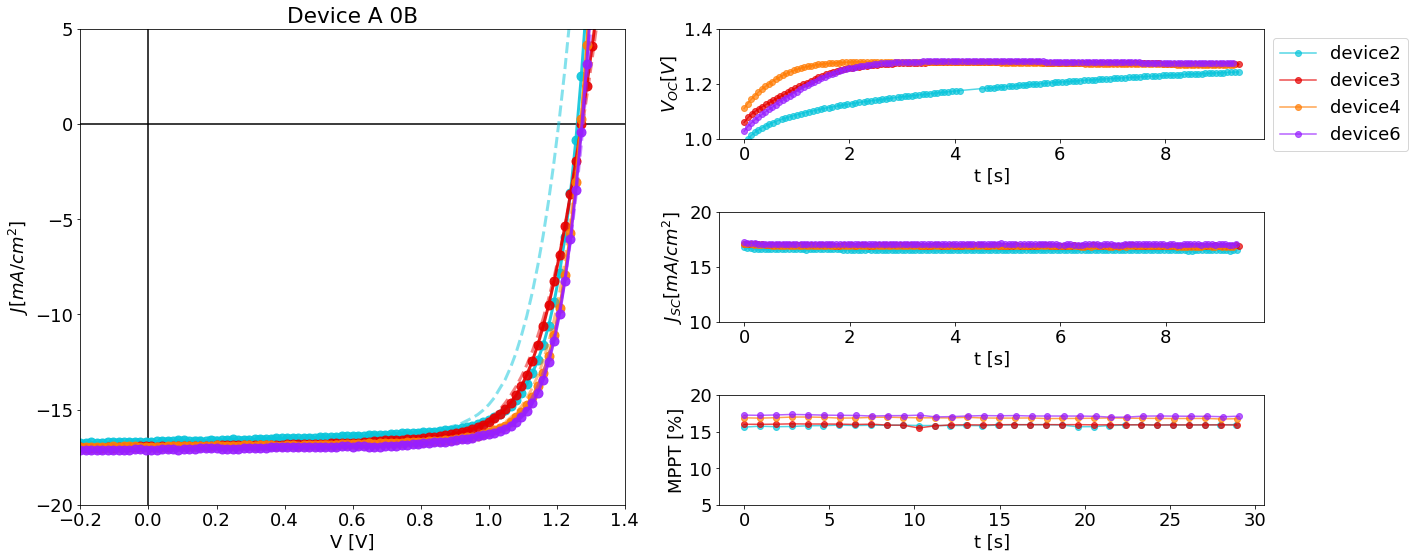

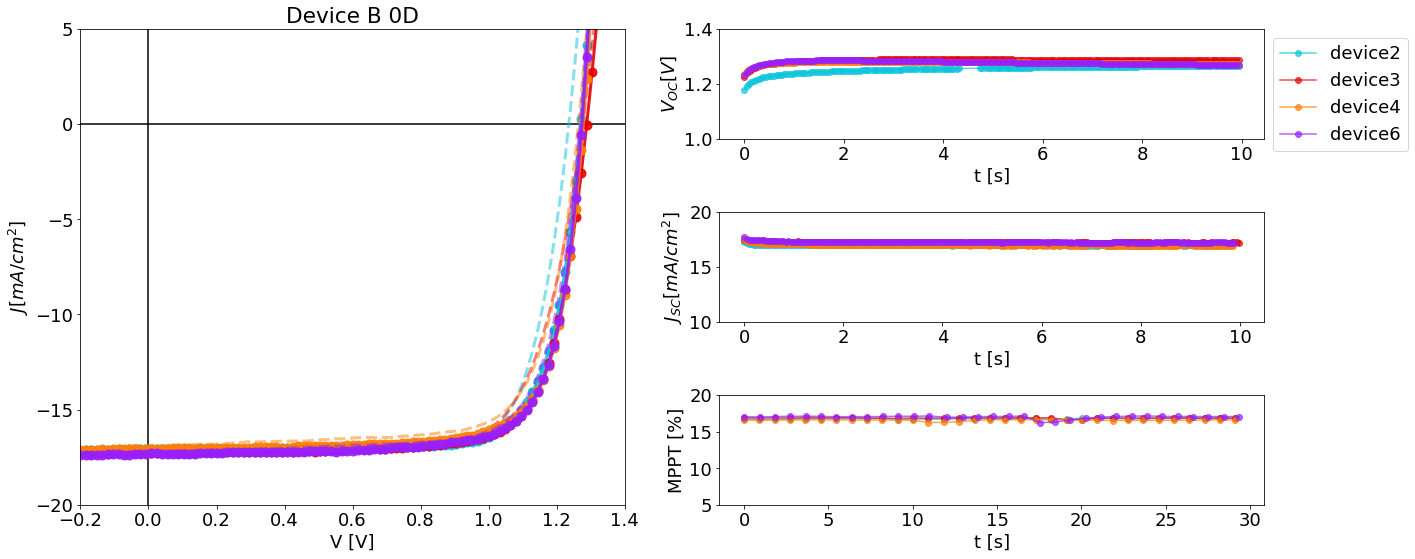

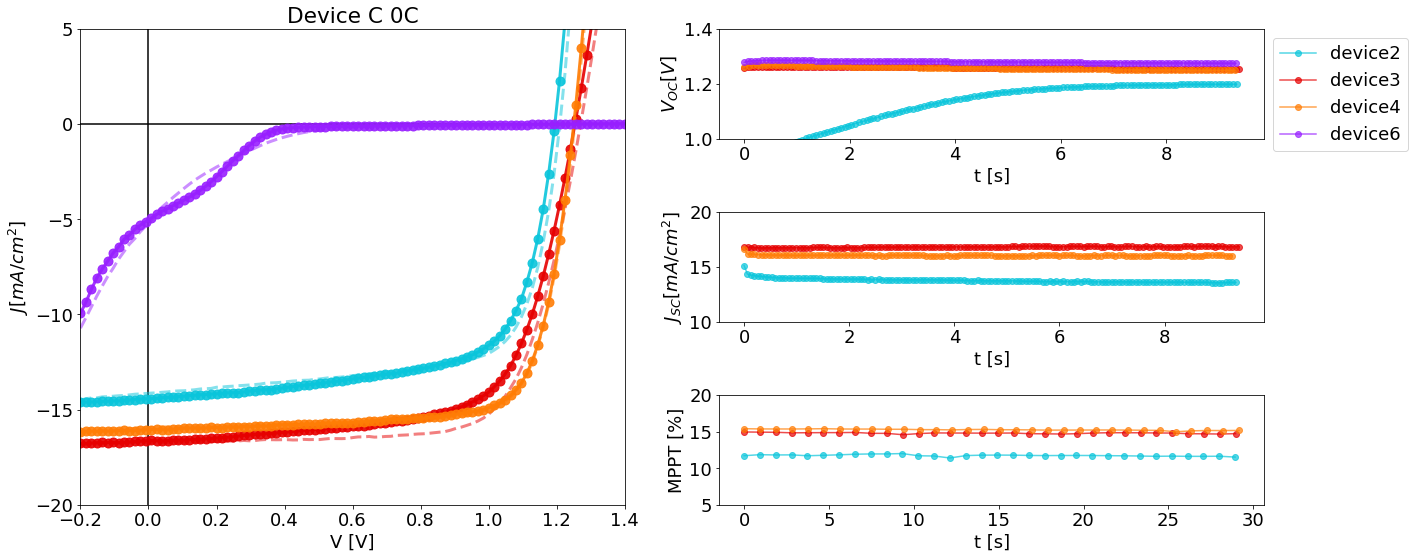

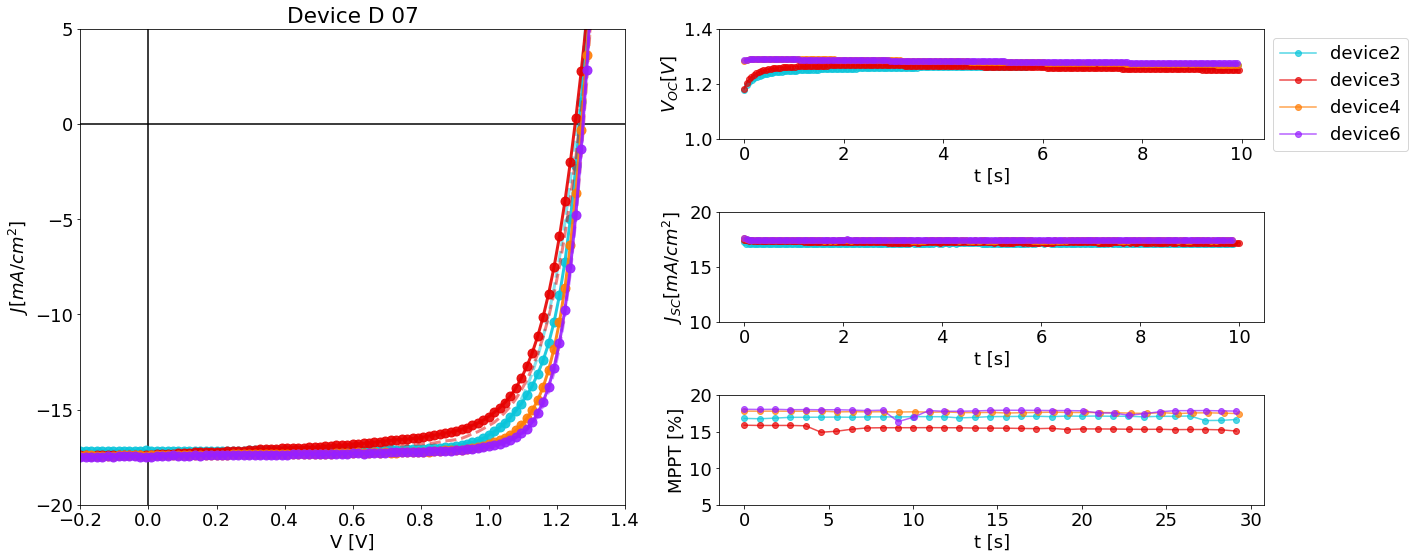

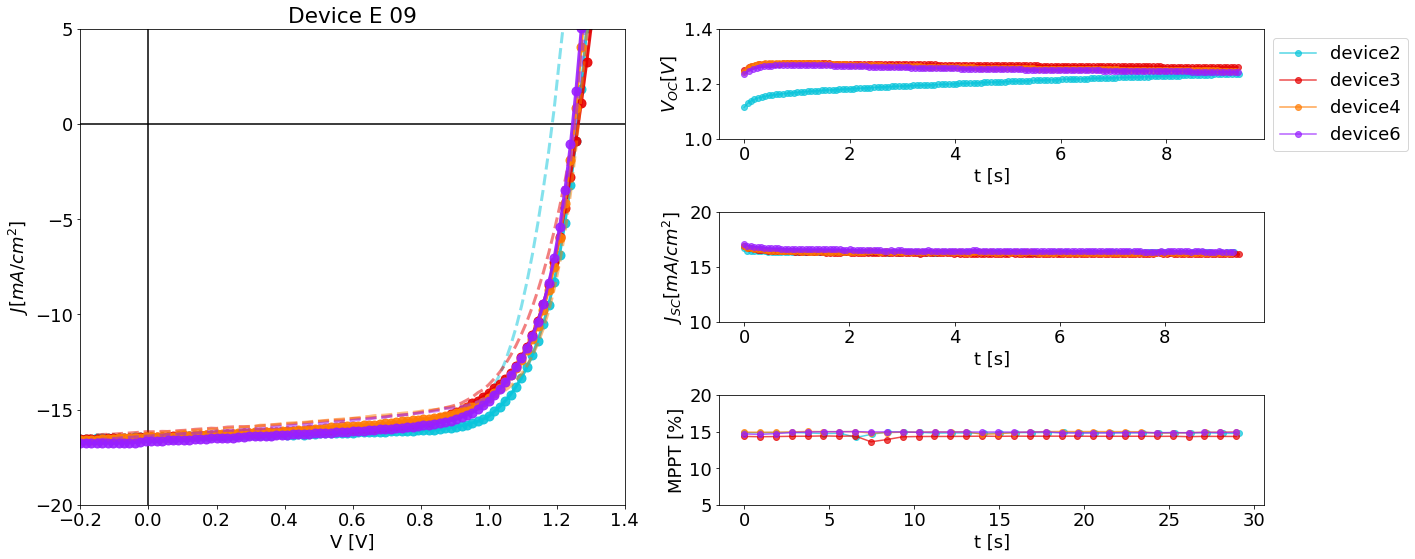

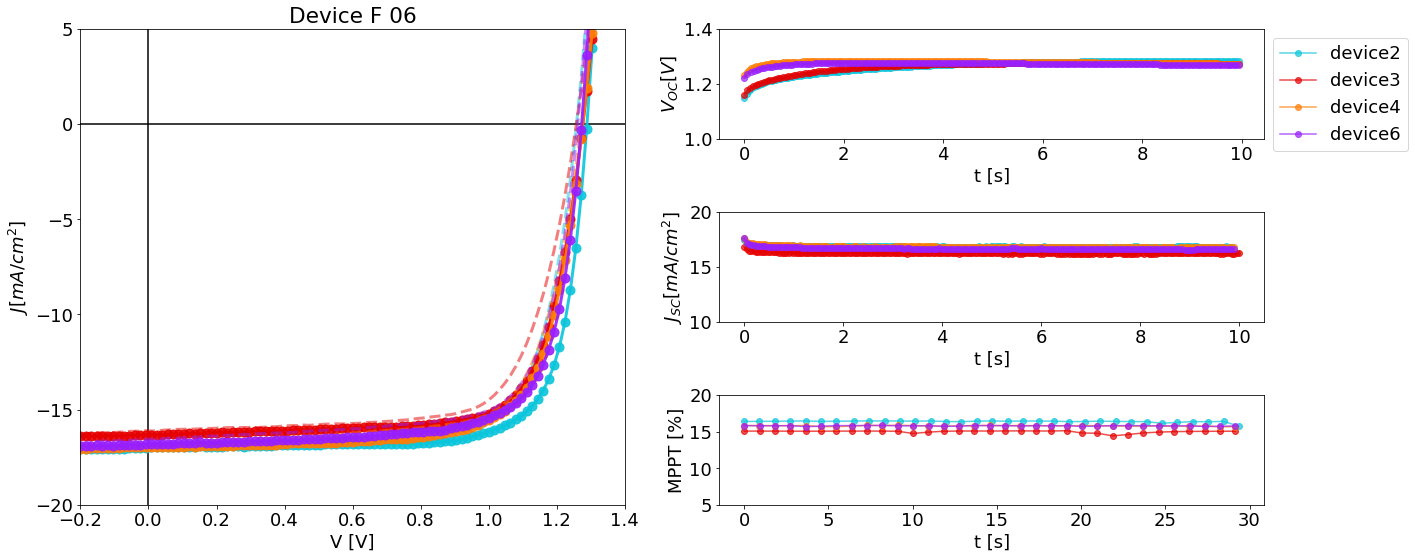

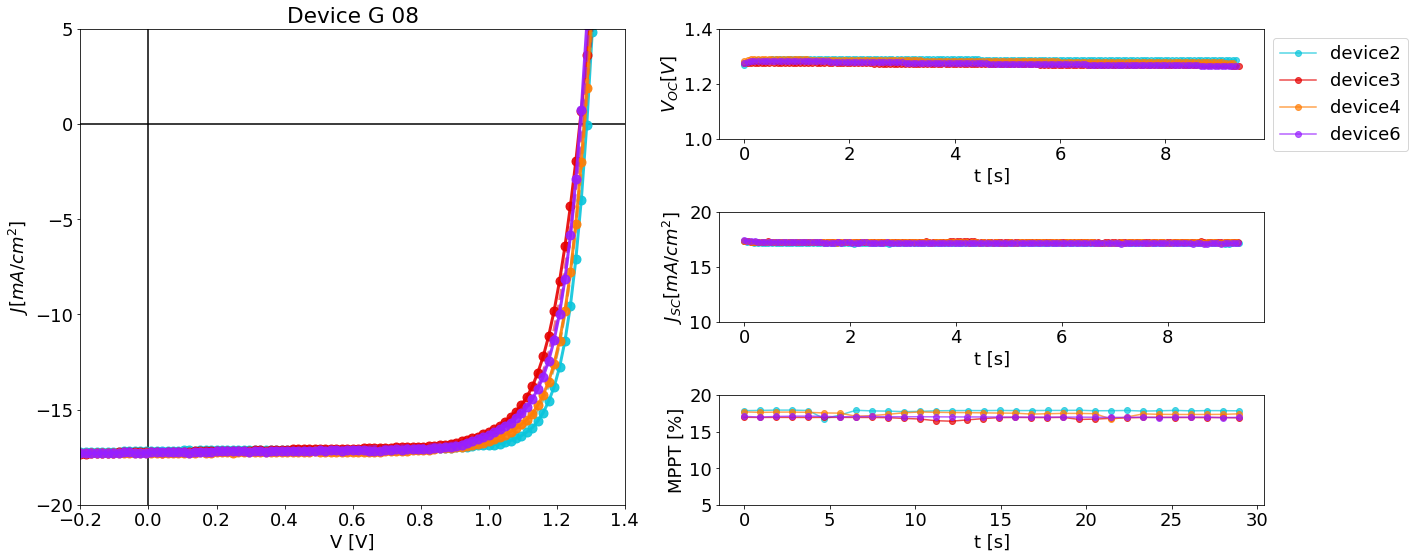

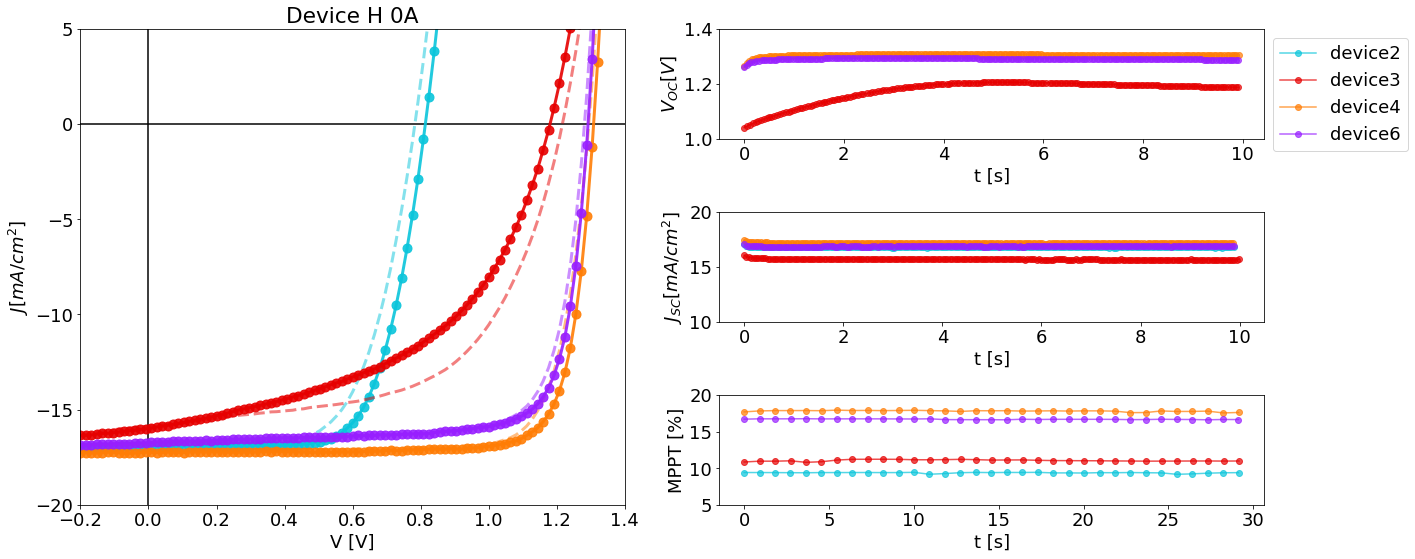

In [5]:
#Plotting JV curves

colours = ['#0ac5db','#e60000','#ff7d05','#981fff', '#66cc4d','#ff51d6' ]


plt.rcParams.update({'font.size': 18})  
 
for cell, label in zip(cells, labels):
    fig = plt.figure(figsize=(20, 10))
    fig.patch.set_facecolor('white')
    p0 = plt.subplot2grid((4, 2), (0, 0), rowspan=3)
    p0.axhline(y=0, color='k')
    p0.axvline(x=0, color='k')
    p1 = plt.subplot2grid((4, 2), (0, 1), colspan=1)
    p2 = plt.subplot2grid((4, 2), (1, 1), colspan=1)
    p3 = plt.subplot2grid((4, 2), (2, 1), colspan=1) 
    
    for k,j in enumerate(pxls):   
        if light_JV1:
            p0.plot(-light_JV1[cell][k]['voltage'],light_JV1[cell][k]['current_corrected'],'-o',alpha=0.9, color=colours[k], ms=9, lw=3)
            p0.plot(-light_JV2[cell][k]['voltage'],light_JV2[cell][k]['current_corrected'],'--',alpha=0.5, color=colours[k],lw=3)

        if stab_volts:
            p1.plot(stab_volts[cell][k]['time'],-stab_volts[cell][k]['voltage'],'-o',alpha=0.7, color=colours[k])

        if stab_current:
            p2.plot(stab_current[cell][k]['time'],-stab_current[cell][k]['current_corrected'],'-o',alpha=0.7, color=colours[k])

        if MPPT:
            p3.plot(MPPT[cell][k]['time'],MPPT[cell][k]['PCE'],'-o',alpha=0.7, color=colours[k])

    p0.set_title(f'Device {cell} {label}')
    p0.set_xlim([-0.2,1.4])   
    p0.set_ylim([-20,5])
    p0.set_xlabel('V [V]')
    p0.set_ylabel('$J [mA/cm^2]$')
    p1.legend(device_list,bbox_to_anchor=(1, 1))

    p1.set_ylim([1,1.4])
    p1.set_xlabel('t [s]')
    p1.set_ylabel('$V_{OC} [V]$')

    p2.set_ylim([10,20])
    p2.set_xlabel('t [s]')
    p2.set_ylabel('$J_{SC} [mA/cm^2]$')

    p3.set_ylim([5,20])
    p3.set_xlabel('t [s]')
    p3.set_ylabel('MPPT [%]')

    fig.tight_layout()
    
    fig.savefig(save_path + f'/Device_{cell}_{label}.png')
 


<h1>Calculate JV parameters for statistics</h1>

In [6]:
# Statistics 

areas = device_info.loc[device_info['slot']==cell]['area'].reset_index().drop('index',axis=1).values.tolist()

d = {'area': areas,'device': device_list }

all_Jsc = pd.DataFrame(data = d)
all_Voc = pd.DataFrame(data = d)
all_FF = pd.DataFrame(data = d)
all_PCE = pd.DataFrame(data = d)
all_MPPT = pd.DataFrame(data = d)
# all_stats = pd.Datpd.DataFrame()aFrame()

for cell in cells:
    Jsc_list = list()
    Voc_list = list()
    FF_list = list()
    PCE_list = list()
    MPPT_list = list()
    
    for k,j in enumerate(pxls):
        Jsc = np.interp(0, light_JV1[cell][k]['voltage'], light_JV1[cell][k]['current_corrected'])
        Voc = np.interp(0, sorted(light_JV1[cell][k]['current_corrected']), sorted(-light_JV1[cell][k]['voltage']))
        FF = max(light_JV1[cell][k]['voltage']*light_JV1[cell][k]['current_corrected'])/(-Jsc*Voc)
        PCE = FF*Voc*-Jsc 
        MPPT_2 = np.mean(MPPT[cell][k]['PCE'][-10:])
        
        Jsc_list.append(-Jsc)
        Voc_list.append(Voc)
        FF_list.append(FF)
        PCE_list.append(PCE)
        MPPT_list.append(MPPT_2)
        
    all_Jsc[cell] = Jsc_list
    all_Voc[cell] = Voc_list
    all_FF[cell] = FF_list
    all_PCE[cell] = PCE_list
    all_MPPT[cell] = MPPT_list

all_Jsc.to_csv(save_path + '/Jsc.csv')
all_Voc.to_csv(save_path + '/Voc.csv')
all_FF.to_csv(save_path + '/FF.csv')
all_PCE.to_csv(save_path + '/PCE.csv')
all_MPPT.to_csv(save_path + '/MPPT.csv')



In [7]:
# Create one big dataframe

all_stats = pd.DataFrame()

JV_melt = pd.melt(all_Jsc.drop(columns=['area','device']))
Voc_melt = pd.melt(all_Voc.drop(columns=['area','device']))
FF_melt = pd.melt(all_FF.drop(columns=['area','device']))
PCE_melt = pd.melt(all_PCE.drop(columns=['area','device']))
MPPT_melt = pd.melt(all_MPPT.drop(columns=['area','device']))

pxls = device_info['pad'].drop_duplicates().values.tolist()
cells = device_info['slot'].drop_duplicates().values.tolist()
labels = device_info['user_label'].drop_duplicates().values.tolist()
active_area = device_info['area'].drop_duplicates().values.tolist()

all_stats['label'] = device_info['user_label']
all_stats['variable'] = device_info['Variable']
all_stats['device'] = device_info['slot']
all_stats['pixel'] = device_info['pad']
all_stats['area'] = device_info['area']
all_stats['Jsc'] = JV_melt['value']
all_stats['Voc'] = Voc_melt['value']
all_stats['FF'] = FF_melt['value']
all_stats['PCE'] = PCE_melt['value']
all_stats['MPPT'] = MPPT_melt['value']





<h1>Plotting box plots grouping per device slot</h1>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


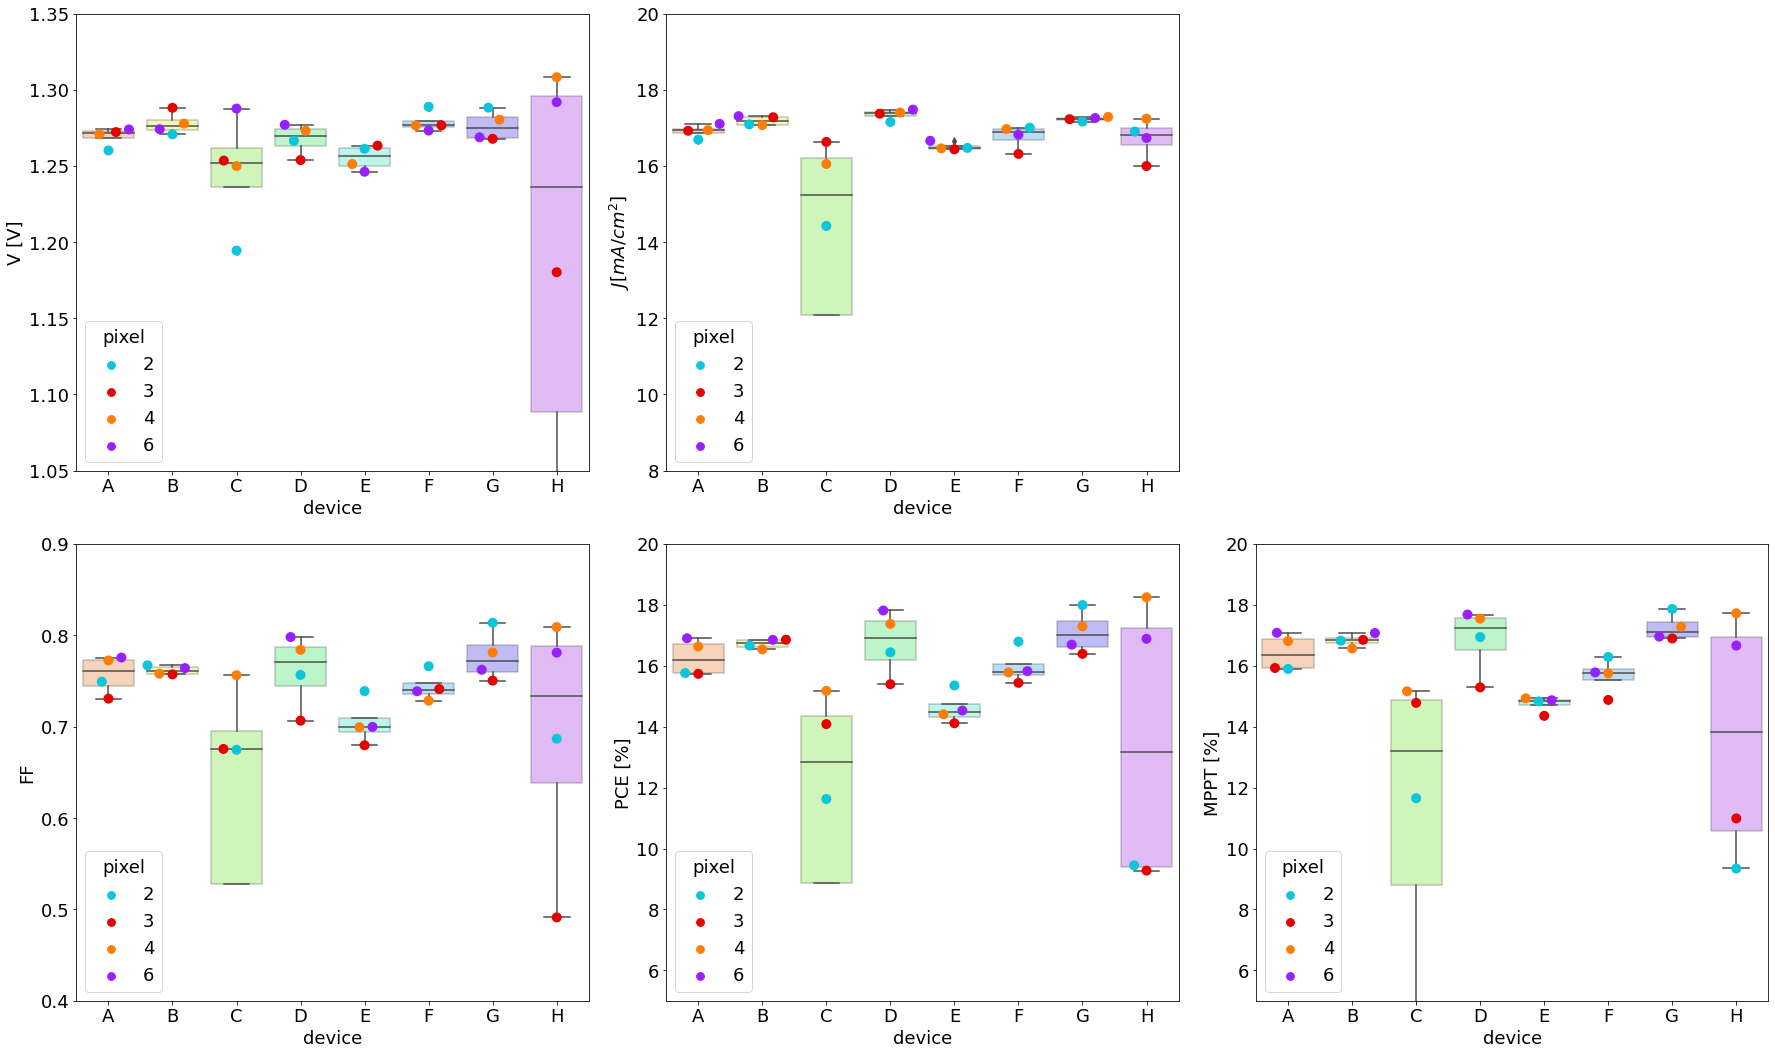

In [9]:
# Boxplots grouped per single device

fig = plt.figure(figsize=(25, 15))
fig.patch.set_facecolor('white')

filter_condition = 'device'
sub_group = 'pixel'

color_theme='gist_rainbow'

p0 = plt.subplot2grid((2, 3), (0, 0))
p1 = plt.subplot2grid((2, 3), (0, 1))
p2 = plt.subplot2grid((2, 3), (1, 0))
p3 = plt.subplot2grid((2, 3), (1, 1))
p4 = plt.subplot2grid((2, 3), (1, 2))

p0 =sns.boxplot(ax=p0, y='Voc', x=filter_condition, data = all_stats, boxprops=dict(alpha=.3), palette=color_theme)
p0 =sns.swarmplot(ax=p0, y='Voc', x=filter_condition, data = all_stats, hue=sub_group, size=10, palette=colours)
p1 =sns.boxplot(ax=p1, y='Jsc', x=filter_condition, data = all_stats, boxprops=dict(alpha=.3), palette=color_theme)
p1 =sns.swarmplot(ax=p1, y='Jsc', x=filter_condition, data = all_stats, hue=sub_group, size=10, palette=colours)
p2 =sns.boxplot(ax=p2, y='FF', x=filter_condition, data = all_stats, boxprops=dict(alpha=.3), palette=color_theme)
p2 =sns.swarmplot(ax=p2, y='FF', x=filter_condition, data = all_stats, hue=sub_group, size=10, palette=colours)
p3 =sns.boxplot(ax=p3, y='PCE', x=filter_condition, data = all_stats, boxprops=dict(alpha=.3), palette=color_theme)
p3 =sns.swarmplot(ax=p3, y='PCE', x=filter_condition, data = all_stats, hue=sub_group, size=10, palette=colours)
p4 =sns.boxplot(ax=p4, y='MPPT', x=filter_condition, data = all_stats, boxprops=dict(alpha=.3), palette=color_theme)
p4 =sns.swarmplot(ax=p4, y='MPPT', x=filter_condition, data = all_stats, hue=sub_group, size=10, palette=colours)


p0.set_ylim([1.05, 1.35])
p0.set_ylabel('V [V]')
p1.set_ylim([8, 20])
p1.set_ylabel('$J [mA/cm^2]$')
p2.set_ylim([0.4, .9])
p2.set_ylabel('FF')
p3.set_ylim([5, 20])
p3.set_ylabel('PCE [%]')
p4.set_ylim([5, 20])
p4.set_ylabel('MPPT [%]')


fig.tight_layout()
fig.savefig(save_path + '/full_stats.png')


<h1>Plotting box plots grouping per device condition</h1>

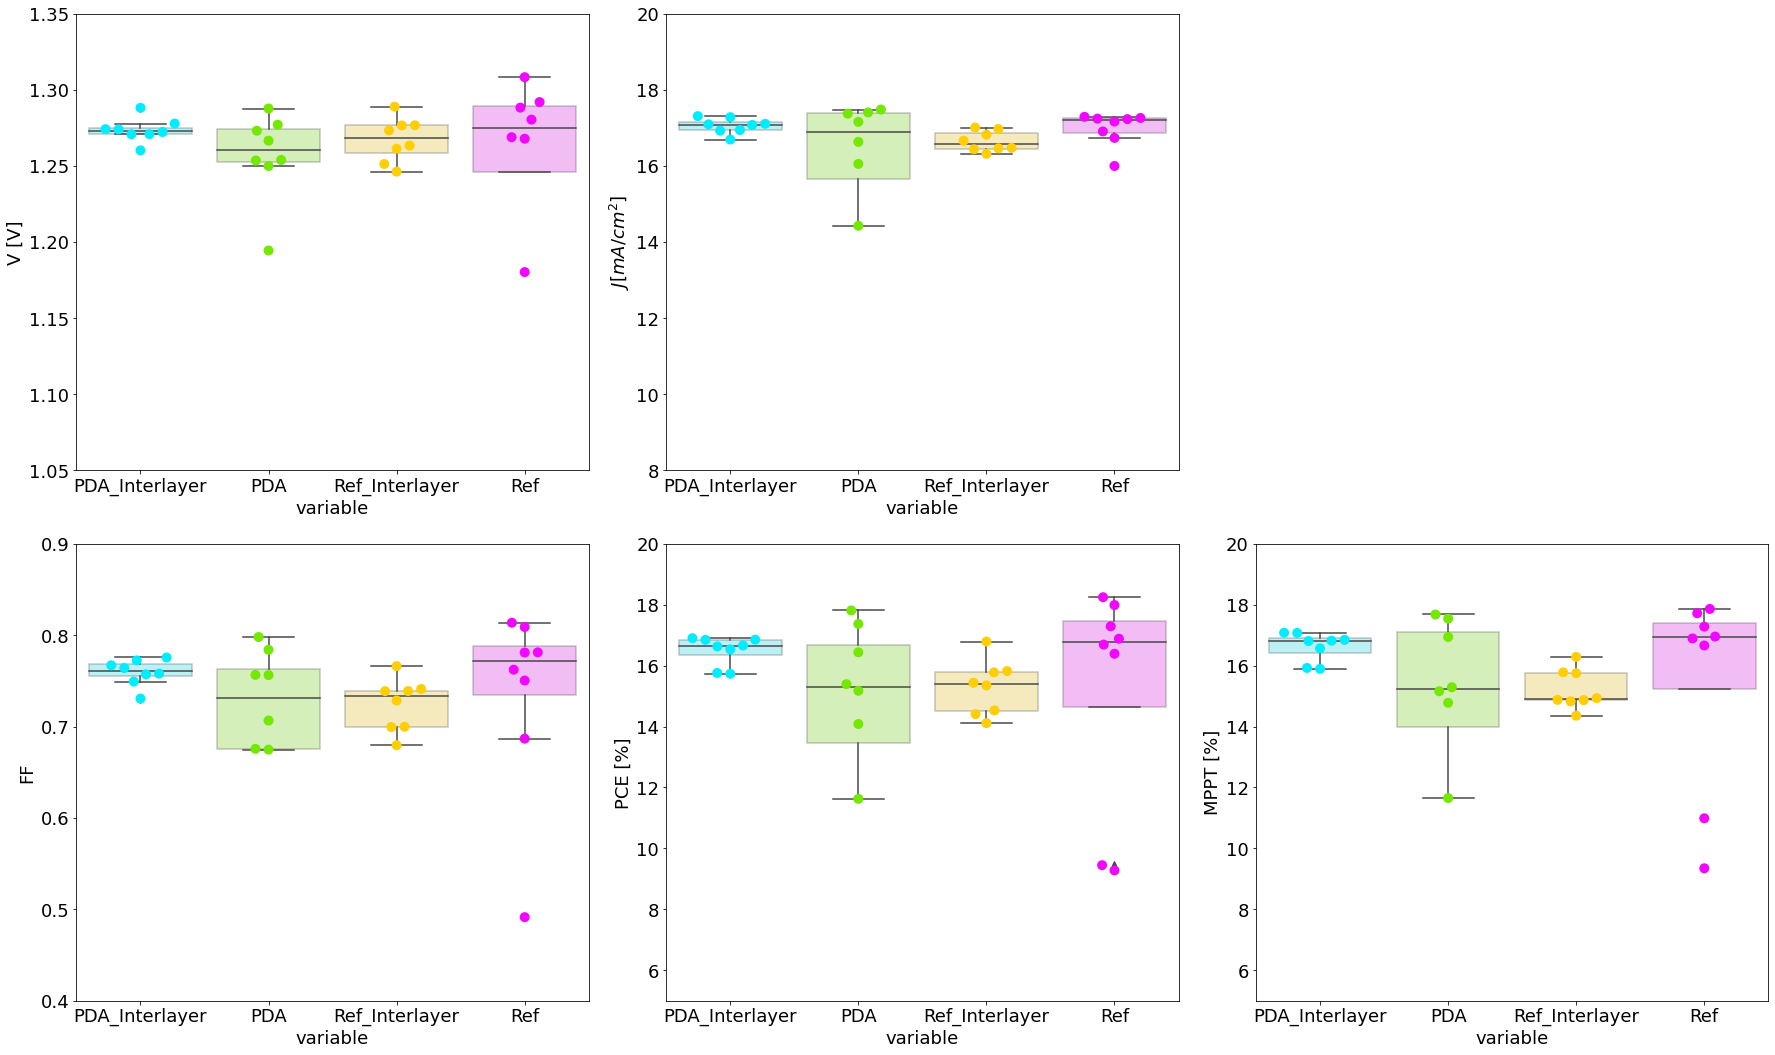

In [10]:
# Boxplots grouped per variable

filter_condition = 'variable'

fig = plt.figure(figsize=(25, 15))
fig.patch.set_facecolor('white')
sub_group = 'area'

color_theme = 'gist_ncar'

p0 = plt.subplot2grid((2, 3), (0, 0))
p1 = plt.subplot2grid((2, 3), (0, 1))
p2 = plt.subplot2grid((2, 3), (1, 0))
p3 = plt.subplot2grid((2, 3), (1, 1))
p4 = plt.subplot2grid((2, 3), (1, 2))

p0 =sns.boxplot(ax=p0, y='Voc', x=filter_condition, data = all_stats, boxprops=dict(alpha=.3), palette=color_theme)
p0 =sns.swarmplot(ax=p0, y='Voc', x=filter_condition, data = all_stats,  size=10, palette=color_theme)
p1 =sns.boxplot(ax=p1, y='Jsc', x=filter_condition, data = all_stats, boxprops=dict(alpha=.3), palette=color_theme)
p1 =sns.swarmplot(ax=p1, y='Jsc', x=filter_condition, data = all_stats,  size=10, palette=color_theme)
p2 =sns.boxplot(ax=p2, y='FF', x=filter_condition, data = all_stats, boxprops=dict(alpha=.3), palette=color_theme)
p2 =sns.swarmplot(ax=p2, y='FF', x=filter_condition, data = all_stats,  size=10, palette=color_theme)
p3 =sns.boxplot(ax=p3, y='PCE', x=filter_condition, data = all_stats, boxprops=dict(alpha=.3), palette=color_theme)
p3 =sns.swarmplot(ax=p3, y='PCE', x=filter_condition, data = all_stats,  size=10, palette=color_theme)
p4 =sns.boxplot(ax=p4, y='MPPT', x=filter_condition, data = all_stats, boxprops=dict(alpha=.3), palette=color_theme)
p4 =sns.swarmplot(ax=p4, y='MPPT', x=filter_condition, data = all_stats,  size=10, palette=color_theme)
 
p0.set_ylim([1.05, 1.35])
p0.set_ylabel('V [V]')
p1.set_ylim([8, 20])
p1.set_ylabel('$J [mA/cm^2]$')
p2.set_ylim([0.4, .9])
p2.set_ylabel('FF')
p3.set_ylim([5, 20])
p3.set_ylabel('PCE [%]')
p4.set_ylim([5, 20])
p4.set_ylabel('MPPT [%]')


fig.tight_layout()
fig.savefig(save_path + '/variable_stats.png')